# Credentials für den Bilderkennungsdienst festlegen

Basierend auf [diesen](https://learn.microsoft.com/de-de/azure/cognitive-services/computer-vision/quickstarts-sdk/client-library?tabs=visual-studio&pivots=programming-language-rest-api) Artikel !

In [145]:
api_key = "geheim"
api_endpunkt = "https://tubilderkennung.cognitiveservices.azure.com/"
image_name= "note.jpg"

api_endpunkt=api_endpunkt.split(".")[0];
api_endpunkt=api_endpunkt[8:]
api_endpunkt


'tubilderkennung'

# Laden des Bildes

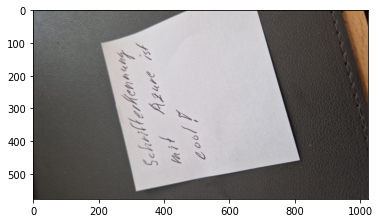

In [146]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

im = Image.open(image_name)

# Create figure and axes
fig, ax = plt.subplots()

# Display the image
ax.imshow(im)

plt.show()



# 1. API Aufruf

Mit dem ersten API Aufruf wird das Bild hochgeladen

In [147]:
import requests

files = [('file', (image_name, open(image_name, 'rb'), 'image/jpeg'))]


headers = {
    'Ocp-Apim-Subscription-Key': api_key
}
r2 = requests.post("https://"+api_endpunkt+".cognitiveservices.azure.com/vision/v3.2/read/analyze", files=files, headers=headers)
ol=r2.headers["Operation-Location"]
print(ol)

https://tubilderkennung.cognitiveservices.azure.com/vision/v3.2/read/analyzeResults/462704e6-51ba-4fa2-b61c-c1140e6486b8


# 2. Api Aufruf 

Mit dem 2. Request werden die Bilddaten abgerufen

In [148]:
import json
from urllib import response
import time

running=True

while running:
    time.sleep(1)
    r3 = requests.get(ol,headers=headers)
    mydata = json.loads(r3.text)

    if mydata["status"]=="succeeded":
        running=False


print(json.dumps(mydata, indent=4))


{
    "status": "succeeded",
    "createdDateTime": "2022-10-12T15:45:18Z",
    "lastUpdatedDateTime": "2022-10-12T15:45:18Z",
    "analyzeResult": {
        "version": "3.2.0",
        "modelVersion": "2022-04-30",
        "readResults": [
            {
                "page": 1,
                "angle": -103.0271,
                "width": 1024,
                "height": 577,
                "unit": "pixel",
                "lines": [
                    {
                        "boundingBox": [
                            330,
                            485,
                            254,
                            128,
                            297,
                            117,
                            386,
                            473
                        ],
                        "text": "Schrifterkennung",
                        "appearance": {
                            "style": {
                                "name": "handwriting",
                     

In [149]:
angle=mydata["analyzeResult"]["readResults"][0]["angle"]
lines = mydata["analyzeResult"]["readResults"][0]["lines"]#
print(json.dumps(lines, indent=4))


[
    {
        "boundingBox": [
            330,
            485,
            254,
            128,
            297,
            117,
            386,
            473
        ],
        "text": "Schrifterkennung",
        "appearance": {
            "style": {
                "name": "handwriting",
                "confidence": 1
            }
        },
        "words": [
            {
                "boundingBox": [
                    339,
                    484,
                    254,
                    130,
                    296,
                    122,
                    385,
                    470
                ],
                "text": "Schrifterkennung",
                "confidence": 0.823
            }
        ]
    },
    {
        "boundingBox": [
            411,
            477,
            383,
            372,
            431,
            357,
            457,
            465
        ],
        "text": "mit",
        "appearance": {
            "style": {


# Nun noch die Ergebnisse in das Bild eintragen

Schrifterkennung
mit
Azure
ist
Cool
!


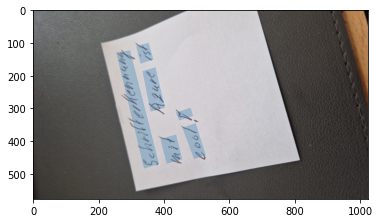

<Figure size 1440x720 with 0 Axes>

In [150]:
import numpy as np
from matplotlib.pyplot import figure


im = Image.open(image_name)

# Create figure and axes
fig, ax = plt.subplots()
plt.figure(figsize=(20, 10))
# Display the image
ax.imshow(im)

for line in lines:
    words = line["words"]
    for word in words:
        ar1 = np.array(word["boundingBox"])
        coord = np.reshape(ar1, (-1, 2))
        rect = patches.Polygon(coord, alpha=0.3)
        # Add the patch to the Axes
        ax.add_patch(rect)
        #ax.text(ar1[0], ar1[1], word["text"],rotation=-angle)
        print(word["text"])


plt.show()
